In [0]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.metrics import accuracy_score,confusion_matrix

warnings.filterwarnings('ignore')
%matplotlib inline



In [8]:
training = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
training.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [9]:
# About Dataset

print(training.shape)

print(training.info())


(42000, 785)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB
None


In [10]:
# About Dataset

print(test.shape)

print(test.info())

(28000, 784)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB
None


Check for Missing Data (NaN)

In [40]:
training.isnull().sum().any()

False

In [11]:
# Checking the class distributions for Training

training.label.value_counts().sort_values(ascending=False)

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

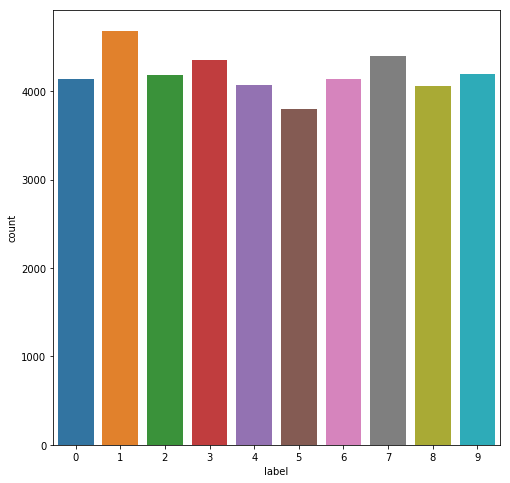

In [12]:
plt.figure(figsize=(8,8))
sns.countplot(training.label)

Above plot looks okay and suggest class is sort of balanced properly

In [0]:
# Used stratify = training_y so that we can preserve the class distribution while train test split.
from sklearn.model_selection import train_test_split
train, test = train_test_split(training, test_size=0.80, train_size=0.20, random_state=69)

In [14]:
train.label.value_counts()

1    912
3    880
2    857
6    842
4    841
9    841
0    837
7    836
8    808
5    746
Name: label, dtype: int64

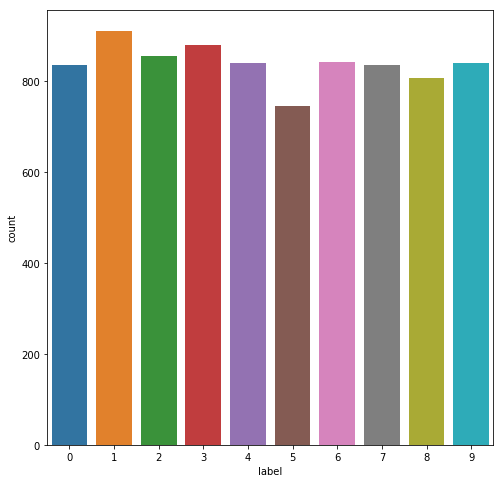

In [15]:
# Checking class distribution on train data
plt.figure(figsize=(8,8))
sns.countplot(train.label)
plt.show()

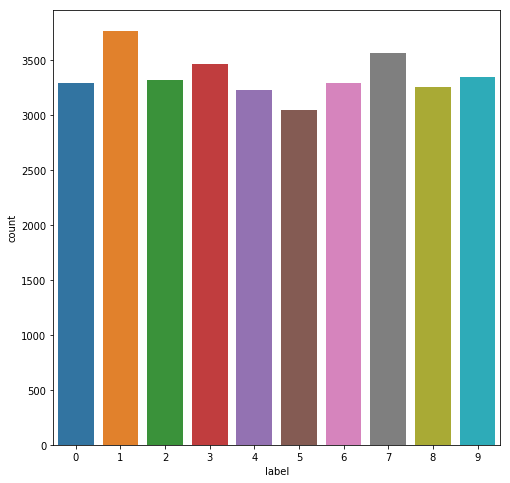

In [16]:
# Checking class distribution on test data
plt.figure(figsize=(8,8))
sns.countplot(test.label)
plt.show()

In [0]:
# Seperating Features Attributes from Target Variables.
X_train = train.iloc[:,1:]
y_train = train.iloc[:,0:1]
X_test = test.iloc[:,1:]
y_test = test.iloc[:,0:1]

In [0]:
# Data Standardization using standard scaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [0]:
# Fitting Support Vector Machines to Training Data
from sklearn.svm import SVC
model_linear = SVC(kernel='linear')
model_linear.fit(X_train,y_train)

# predict
y_pred = model_linear.predict(X_test)

In [140]:
from sklearn.metrics import accuracy_score,confusion_matrix

#score
print("Classifier Score:", model_linear.score(X_test,y_test), '\n')

# accuracy
print("accuracy:", accuracy_score(y_test, y_pred), "\n")

# cm
print(confusion_matrix(y_test, y_pred))

Classifier Score: 0.9072619047619047 

accuracy: 0.9072619047619047 

[[3194    0   19    9    7   17   33    1   11    4]
 [   0 3704   17   12    6    1    1    5   19    7]
 [  31   45 3003   55   49    7   26   51   43   10]
 [  15   28  117 3078    7  104    7   26   56   33]
 [   8   10   39    2 3030    4   19   16    6   97]
 [  55   19   41  174   31 2591   41   10   64   23]
 [  34    9   62    3   72   46 3061    0    8    0]
 [  17   24   44   26   59    6    0 3220    3  166]
 [  27   51   93  165   21   97   26   21 2708   46]
 [  21   11   21   36  179   28    1  138   17 2895]]


In [0]:
# Fitting Support Vector Machines to Training Data
from sklearn.svm import SVC
model_poly = SVC(kernel='poly')
model_poly.fit(X_train,y_train)

# predict
y_pred = model_poly.predict(X_test)

In [146]:
from sklearn.metrics import accuracy_score,confusion_matrix

#score
print("Classifier Score:", model_poly.score(X_test,y_test), '\n')

# accuracy
print("accuracy:", accuracy_score(y_test, y_pred), "\n")

# cm
print(confusion_matrix(y_test, y_pred))

Classifier Score: 0.8608333333333333 

accuracy: 0.8608333333333333 

[[2908    0    5    6  142   12   27    0  194    1]
 [   0 3687   10    3   27    1    5    0   38    1]
 [   7   18 2535   57  265    1   14   12  405    6]
 [   0   17   34 2915   94   13    3   23  335   37]
 [   4    9    9    3 3113    2    6    1    7   77]
 [   4    0    7  121  201 2200   33    3  429   51]
 [  12   10   28    0  217   30 2882    0  116    0]
 [   6   50   15   11  307    0    0 2683   44  449]
 [   2   13   13   46   76   23    1    3 3050   28]
 [  11   11   12   26  244    3    0   39   50 2951]]


In [0]:
# Fitting Support Vector Machines to Training Data
from sklearn.svm import SVC
model_rbf = SVC(kernel='rbf')
model_rbf.fit(X_train,y_train)

# predict
y_pred = model_rbf.predict(X_test)

In [149]:
from sklearn.metrics import accuracy_score,confusion_matrix

#score
print("Classifier Score:", model_rbf.score(X_test,y_test), '\n')

# accuracy
print("accuracy:", accuracy_score(y_test, y_pred), "\n")

# cm
print(confusion_matrix(y_test, y_pred))

Classifier Score: 0.9350595238095238 

accuracy: 0.9350595238095238 

[[3192    0   37    4    6    9   28    1   17    1]
 [   0 3686   36   16    5    3    3    6   11    6]
 [  14    9 3175   24   21    2   13   33   25    4]
 [   3   12  130 3171    1   43    4   42   46   19]
 [   1    9   75    1 3044    9   11    9    5   67]
 [  13    6   56   93    9 2778   52    7   18   17]
 [  22    7   96    0   20   29 3110    0   11    0]
 [   9   28  112    8   28    2    0 3267    2  109]
 [   9   34   55   72   16   56   19   16 2945   33]
 [  15    9   59   35   75    7    0   82   15 3050]]


As we are getting better accuracy on RBF. Going forward with RBF kernel to further finetune hyperparameters



## Grid Search: Hyperparameter Tuning

Let's now tune the model to find the optimal values of C and gamma corresponding to an RBF kernel. We'll use 5-fold cross validation.

In [150]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

folds = KFold(n_splits=5, shuffle=True, random_state=45)

# specify range of hyperparameters
# Set the parameters by cross-validation
hyper_params = [ {'gamma': [1e-1, 1e-2, 1e-3, 1e-4, 10,1],
                     'C': [1, 10, 100, 10e5, 10e3]}]

# specify model
model = SVC(kernel="rbf")

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)   

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed: 309.8min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=45, shuffle=True),
             error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000000.0, 10000.0],
                          'gamma': [0.1, 0.01, 0.001, 0.0001, 10, 1]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='accuracy', verbose=1)

In [151]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,97.937437,0.502357,14.561951,0.051076,1,0.1,"{'C': 1, 'gamma': 0.1}",0.151190,0.160714,0.173214,0.173810,0.169048,0.165595,0.008588,20,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
1,84.122349,0.739044,11.946334,0.207746,1,0.01,"{'C': 1, 'gamma': 0.01}",0.747619,0.735714,0.754167,0.738095,0.744048,0.743929,0.006633,15,0.999405,0.999554,0.999851,0.999702,0.999851,0.999673,0.000174
2,20.663302,0.235423,6.516023,0.212563,1,0.001,"{'C': 1, 'gamma': 0.001}",0.926786,0.932738,0.934524,0.939286,0.926786,0.932024,0.004783,5,0.970833,0.972470,0.970833,0.971280,0.971726,0.971429,0.000617
3,30.518504,0.291422,9.082336,0.123266,1,0.0001,"{'C': 1, 'gamma': 0.0001}",0.900000,0.901190,0.907738,0.904167,0.895833,0.901786,0.004002,10,0.915774,0.916071,0.912054,0.915327,0.913542,0.914554,0.001527
4,96.178904,0.745327,14.480650,0.135350,1,10,"{'C': 1, 'gamma': 10}",0.092857,0.089881,0.101786,0.095238,0.109524,0.097857,0.007029,26,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
5,97.906201,0.633255,14.938303,0.558942,1,1,"{'C': 1, 'gamma': 1}",0.092857,0.090476,0.101786,0.095238,0.109524,0.097976,0.006897,21,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
6,96.992858,1.190874,14.294139,0.167756,10,0.1,"{'C': 10, 'gamma': 0.1}",0.154762,0.164881,0.174405,0.176190,0.173214,0.168690,0.007974,16,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
7,86.185398,1.150512,12.224376,0.502005,10,0.01,"{'C': 10, 'gamma': 0.01}",0.764881,0.751190,0.773214,0.757738,0.761310,0.761667,0.007335,11,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
8,17.072541,0.277857,5.697106,0.057349,10,0.001,"{'C': 10, 'gamma': 0.001}",0.935119,0.939286,0.944643,0.944643,0.935119,0.939762,0.004266,1,0.998810,0.998661,0.998661,0.998958,0.998363,0.998690,0.000197
9,14.106773,0.246222,5.630136,0.216611,10,0.0001,"{'C': 10, 'gamma': 0.0001}",0.926190,0.922024,0.930357,0.935714,0.926190,0.928095,0.004632,6,0.958631,0.959673,0.958631,0.958036,0.960714,0.959137,0.000949


In [152]:
# printing the optimal accuracy score and hyperparameters
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.9397619047619048 corresponding to hyperparameters {'C': 10, 'gamma': 0.001}


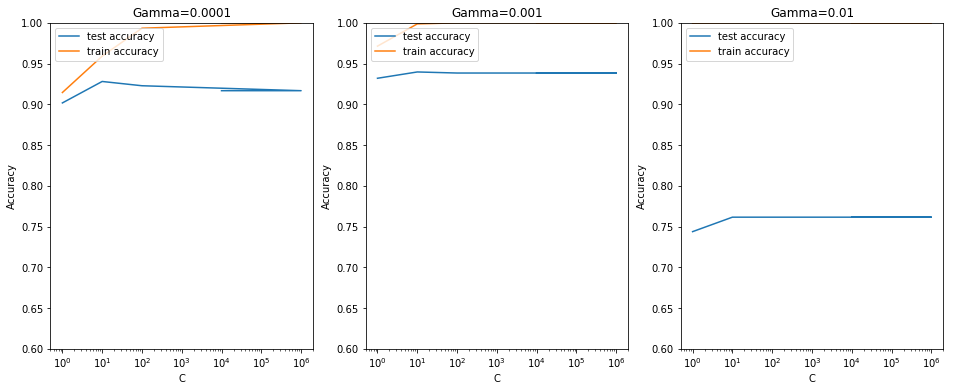

In [167]:
# converting C to numeric type for plotting on x-axis
cv_results['param_C'] = cv_results['param_C'].astype('int')

# # plotting
plt.figure(figsize=(16,6))

# subplot 1/3
plt.subplot(131)
gamma_01 = cv_results[cv_results['param_gamma']==0.0001]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

# subplot 2/3
plt.subplot(132)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


# subplot 3/3
plt.subplot(133)
gamma_0001 = cv_results[cv_results['param_gamma']==0.01]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

The plots above show some useful insights:

- Non-linear models (high gamma) perform *relatively poor* than the linear ones with low gamma which is quite evident from 3rd plot above.
- C with value of 10 outperforms all other combinations and gives us the best test accuracy scores.
- None of the models tend to overfit (even the complex ones), however this accuracy can definitely be improved with the use of more training data.

### Building and Evaluating the Final Model

Let's now build and evaluate the final model, i.e. the model with highest test accuracy.

In [0]:
from sklearn.svm import SVC
model = SVC(gamma=0.001, C= 10, kernel='rbf')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [22]:
print('Final Model\'s Accuracy :', accuracy_score(y_test, y_pred), '\n')

print(confusion_matrix(y_test, y_pred), '\n')

Final Model's Accuracy : 0.9424107142857143 

[[3212    0   29    9    6    3   22    2   12    0]
 [   0 3701   29   10    4    1    1    9   11    6]
 [  12    8 3168   28   21    3   16   38   22    4]
 [   4    6   99 3223    2   38    4   34   37   24]
 [   6   11   66    2 3054    5    9    9    3   66]
 [  19    6   46   97   11 2790   35    8   22   15]
 [  22    5   84    1   18   23 3135    0    7    0]
 [  11   23   92    7   34    6    0 3316    4   72]
 [   9   25   55   74   22   37   19   13 2970   31]
 [  15    9   52   26   71    8    1   57   12 3096]] 



## Class wise Accuracy/Precision

In [38]:
from sklearn.metrics import classification_report
# target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_test, y_pred, digits=4))


              precision    recall  f1-score   support

           0     0.9704    0.9748    0.9726      3295
           1     0.9755    0.9812    0.9783      3772
           2     0.8516    0.9542    0.9000      3320
           3     0.9269    0.9286    0.9277      3471
           4     0.9417    0.9452    0.9435      3231
           5     0.9574    0.9151    0.9358      3049
           6     0.9670    0.9514    0.9592      3295
           7     0.9512    0.9302    0.9406      3565
           8     0.9581    0.9124    0.9347      3255
           9     0.9342    0.9250    0.9296      3347

    accuracy                         0.9424     33600
   macro avg     0.9434    0.9418    0.9422     33600
weighted avg     0.9436    0.9424    0.9426     33600

